<a href="https://colab.research.google.com/github/choheeee22/ds_Section1_Project/blob/main/Section1_Project_GameIndustry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import files
uploaded=files.upload()

import io 

Saving vgames2.csv to vgames2.csv


In [4]:
dfraw=pd.read_csv("vgames2.csv",thousands=',')
dfraw.drop(dfraw.columns[dfraw.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dfraw


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
dfraw.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object

수량 단위는 million으로 추정 (1,000,000)
추정 근거 자료 
https://en.wikipedia.org/wiki/List_of_best-selling_video_games

In [6]:
#sales features 뽑아내기 - df_sales
df_sales=dfraw.loc[:,'NA_Sales':'Other_Sales']
df_sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
...,...,...,...,...
16593,0.15,0.04,0,0.01
16594,0.01,0,0,0
16595,0.44,0.19,0.03,0.13
16596,0.05,0.05,0.25,0.03


In [7]:
#실패 K 바꾸는 함수 (# K->  숫자 *1/1000, M-> 지우기 ) =>실패
#def Kto_numeric(i):
#  for index,value in df_sales.iteritems():
#    #if index==columnname:
#    if value.str.contains("K").any():
#      value=value.str.replace('K','')
#      try:
#        value=pd.to_numeric(value)
      #except:
      #continue
#        return value=value*(1/1000)

In [8]:
#실패 K 바꾸는 함수 (# K->  숫자 *1/1000, M-> 지우기 ) => 실패
#def Mto_numeric(i):
#  for index,value in df_sales.iteritems():
    #if index==columnname:
#    if value.str.contains("M").any():
#      value=value.str.replace('M','')
#      try:
#        value=pd.to_numeric(value)
#      except:
#        continue
#    value=value

In [9]:
def converting(x) :
  if "K" in str(x):
    return pd.to_numeric(str(x).replace("K",""))*(1/1000)
  elif "M" in str(x):
    return pd.to_numeric(str(x).replace("M",""))
  else:
    return float(x)


In [10]:
df_sales['NA_Sales']=df_sales['NA_Sales'].apply(converting)

In [11]:
df_sales['EU_Sales']=df_sales['EU_Sales'].apply(converting)

In [12]:
df_sales['JP_Sales']=df_sales['JP_Sales'].apply(converting)

In [13]:
df_sales['Other_Sales']=df_sales['Other_Sales'].apply(converting)

In [14]:
#Sales Data 수정 후 concat -df
df=pd.concat([dfraw.iloc[:,:5],df_sales],axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [15]:
#Total sales 열 추가 
df['Total_Sales']=df.iloc[:,5:].sum(axis=1)
df['Total_Sales']

0        0.04
1        0.18
2        0.02
3        0.04
4        0.25
         ... 
16593    0.20
16594    0.01
16595    0.79
16596    0.38
16597    0.17
Name: Total_Sales, Length: 16598, dtype: float64

In [16]:
#중복데이터 확인
df[['Name']].duplicated().sum()

5105

In [17]:
#검사 - 진짜 exact match네... 하지만 platform 이 다른건 다른걸로 치겠어 
df.loc[df['Name']=='NBA 2K12']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
270,NBA 2K12,PSP,2011.0,Sports,Take-Two Interactive,0.22,0.03,0.00,0.03,0.28
343,NBA 2K12,X360,2011.0,Sports,Take-Two Interactive,2.31,0.14,0.01,0.16,2.62
6929,NBA 2K12,PS3,2011.0,Sports,Take-Two Interactive,1.61,0.27,0.05,0.18,2.11
9112,NBA 2K12,PC,2011.0,Sports,Take-Two Interactive,0.09,0.05,0.00,0.02,0.16
15533,NBA 2K12,Wii,2011.0,Sports,Take-Two Interactive,0.30,0.03,0.00,0.02,0.35


In [18]:
df[['Name','Platform']].duplicated().sum(),

(5,)

In [19]:
df[['Name','Platform','Year']].duplicated().sum()

2

In [20]:
df_Duplicate=df[df[['Name','Platform','Year','Genre']].duplicated()]
df_Duplicate

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.0,0.01
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.00,0.02,0.0,0.02


In [21]:
#검사 - 진짜 exact match네... 하지만 platform 이 다른건 서로 다른 게임으로 치겠어 (행 8717만 버리기, mean이 1.09 이므로 )
df.loc[df['Name']=='Madden NFL 13']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
4838,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.16,0.0,0.17,2.86
5288,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.22,0.00,0.0,0.02,0.24
7346,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.0,0.22,2.56
8717,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01
9504,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.30,0.00,0.0,0.03,0.33
11995,Madden NFL 13,Wii,2012.0,Sports,Electronic Arts,0.51,0.00,0.0,0.03,0.54


In [22]:
df['Total_Sales'].loc[df['Name']=='Madden NFL 13'].mean()

1.09

In [23]:
# 완전 일치 -> 한 값 버리기 (9184행 )
df.loc[df['Name']=='Wii de Asobu: Metroid Prime'] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
9184,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [24]:
#df에서 중복값 버리기 -> df2
df2=df.drop([df.index[8717],df.index[9184]])
df2

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [25]:
#확인 -> good!
df2.loc[df['Name']=='Wii de Asobu: Metroid Prime'] 

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
8055,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [26]:
#결측치 확인 
pd.DataFrame(df2.isnull().sum(),columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,270
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Total_Sales,0


In [27]:
#결측치 정보 확인 - null_data
null_data=df2[df2.isnull().any(axis=1)]
null_data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0.00,0.00,0.02,0.00,0.02
272,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00,0.03
273,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0.00,0.06,0.00,0.01,0.07
...,...,...,...,...,...,...,...,...,...,...
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.00,0.00,0.06
16431,Cars: Mater-National Championship,X360,2007.0,NaN,THQ,0.13,0.00,0.00,0.01,0.14
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0.00,0.00,0.01,0.14
16555,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0.00,0.03,0.00,0.01,0.04


In [28]:
null_data['Total_Sales'].sum()

160.45999999999998

In [29]:
#결측치 total이 전체 데이터에서 차지하는 비율 (sales & 개수 - 2% 정도임)
null_data['Total_Sales'].sum()/df2['Total_Sales'].sum(),357/16595 #sales unit, 개수

(0.017997222913876676, 0.021512503766194638)

In [30]:
#결측치중 꼭 살려야 하는 데이터 파악 (전체데이터 sales unit 75% 기준)-null_data_important (80/357) -22% 살리기 --> 최종 277 버리기 ->new data 16320 개 
null_data_important=null_data[null_data['Total_Sales']>0.47]
null_data_important

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
31,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48
50,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05,0.70
408,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0.00,0.02,0.50
1041,Metal Gear Solid 2: Substance,XB,NaN,Action,Konami Digital Entertainment,0.38,0.22,0.00,0.03,0.63
1328,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0.00,0.02,0.66
...,...,...,...,...,...,...,...,...,...,...
15426,"WarioWare, Inc.: Mega Party Game$",GC,2003.0,NaN,Nintendo,0.20,0.05,0.44,0.02,0.71
15526,Bloodborne,PS4,2015.0,NaN,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.00,0.05,0.75


In [31]:
#null_data_important column별 결측치 확인 - 얘를 어떻게 할 지는 생각해보자 
pd.DataFrame(null_data_important.isna().sum(),columns=["결측치 개수"])

,결측치 개수
Name,0
Platform,0
Year,54
Genre,21
Publisher,8
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Total_Sales,0


In [32]:
!pip install pandas-profiling==2.7.1 
import pandas_profiling


     |████████████████████████████████| 252 kB 5.5 MB/s 
     |████████████████████████████████| 76 kB 4.8 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 58 kB 6.2 MB/s 
     |████████████████████████████████| 675 kB 39.1 MB/s 
     |████████████████████████████████| 812 kB 39.7 MB/s 
     |████████████████████████████████| 28.5 MB 29 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a00f1d1517f2df78821ba8f06bf620862482e9d6ad028b027d5314d892d6245f
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=600c9d22abd2d4ed13168b67b6ae071db68ffb6e9fdc49d67016f91419c5690e
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    F

In [33]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
#platform/year/genre별 total_sales 보기 -결측치 missing value처리위해 
Total_Sales_by_Genre=pd.DataFrame(df2.groupby(['Genre'])['Total_Sales'].sum().describe())
Total_Sales_by_Platform=pd.DataFrame(df2.groupby(['Platform'])['Total_Sales'].sum().describe())
Total_Sales_by_Year=pd.DataFrame(df2.groupby(['Year'])['Total_Sales'].sum().describe())


In [35]:
Total_Sales_by_Genre_raw=df2[['Genre','Total_Sales']]


In [36]:
all=pd.DataFrame(df2['Total_Sales'].describe())
all

,Total_Sales
count,16596.000000
mean,0.537227
std,1.555234
min,0.000000
25%,0.060000
50%,0.170000
75%,0.472500
max,82.740000


In [37]:
#Total slaes에 대한 statistics 비교 (all, groupby) - Comparing_data
Comparing_data=pd.concat([all,Total_Sales_by_Genre,Total_Sales_by_Platform,Total_Sales_by_Year],axis=1)
columns=['all','Total_Sales_by_Genre','Total_Sales_by_Platform','Total_Sales_by_Year']
Comparing_data.columns=columns
Comparing_data

,all,Total_Sales_by_Genre,Total_Sales_by_Platform,Total_Sales_by_Year
count,16596.000000,12.000000,31.000000,62.000000
mean,0.537227,738.639167,287.607097,142.191129
std,1.555234,476.524407,351.869753,198.235802
min,0.000000,174.840000,0.030000,0.020000
25%,0.060000,354.485000,22.150000,1.592500
50%,0.170000,763.755000,200.040000,35.855000
75%,0.472500,937.742500,287.190000,253.872500
max,82.740000,1741.320000,1255.770000,676.320000


In [38]:
Total_Sales_by_Genre_raw

,Genre,Total_Sales
0,Action,0.04
1,Action,0.18
2,Adventure,0.02
3,Misc,0.04
4,Platform,0.25
...,...,...
16593,Platform,0.20
16594,Action,0.01
16595,Sports,0.79
16596,Action,0.38


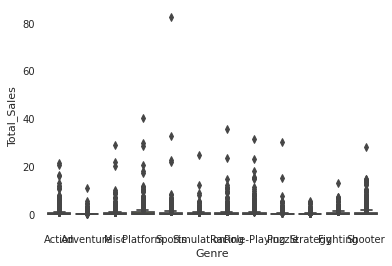

In [39]:
#이상치 검정 (시각화)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.boxplot(x="Genre",y="Total_Sales",data=Total_Sales_by_Genre_raw)
plt.show()

In [40]:
#장르 전체로 봤을 때 median과 mean은 비슷하지만 한 장르내에 편차는 크구나 -> 장르별로 따봉이 하나씩 있다
Total_Sales_by_Genre_raw.groupby(by=['Genre']).describe().transpose

<bound method DataFrame.transpose of              Total_Sales                                                      
                   count      mean       std   min   25%    50%     75%    max
Genre                                                                         
Action            3305.0  0.526874  1.157157  0.01  0.07  0.190  0.5000  21.39
Adventure         1280.0  0.186305  0.514498  0.01  0.02  0.060  0.1600  11.18
Fighting           847.0  0.529398  0.956432  0.01  0.08  0.210  0.5500  13.04
Misc              1734.0  0.461200  1.302625  0.01  0.06  0.160  0.4100  29.01
Platform           884.0  0.939174  2.588174  0.01  0.09  0.275  0.8025  40.24
Puzzle             578.0  0.421228  1.566870  0.01  0.04  0.110  0.3075  30.26
Racing            1243.0  0.585511  1.665938  0.00  0.07  0.190  0.5300  35.83
Role-Playing      1483.0  0.610270  1.666957  0.01  0.07  0.180  0.5200  31.38
Shooter           1307.0  0.792563  1.819471  0.01  0.08  0.230  0.7300  28.31
Simulation     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


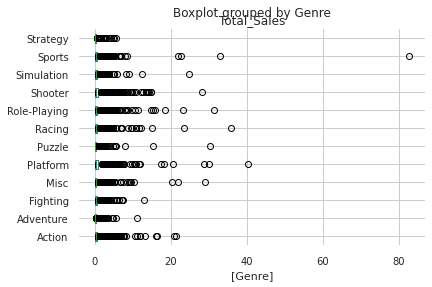

In [41]:
Total_Sales_by_Genre_raw.boxplot(column=["Total_Sales"], by=["Genre"],vert=0)
plt.show()

In [42]:
#큰 값 확인 (https://en.wikipedia.org/wiki/List_of_best-selling_video_games와 비교 -ok)
df2.sort_values(['Total_Sales'],ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [43]:
df2['Total_Sales'].loc[df2['Publisher']=='Nintendo'].sum()/df2['Total_Sales'].sum()

0.20035622074021234

In [44]:
#작은 값 확인 -잘모르겠다 
df2.sort_values(['Total_Sales'],ascending=True).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
5598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.00
16082,Rondo of Swords (jp sales),DS,2007.0,Role-Playing,Success,0.00,0.00,0.01,0.0,0.01
12413,Grooverider: Slot Car Thunder,GC,2003.0,Racing,Encore,0.01,0.00,0.00,0.0,0.01
9171,Sega Golf Club: Miyazato San Kyoudai Naizou,PS3,2006.0,Sports,Sega,0.00,0.00,0.01,0.0,0.01
4214,Routes PE,PS2,2007.0,Adventure,Aqua Plus,0.00,0.00,0.01,0.0,0.01
9176,Nova Usagi no Game de Ryuugaku!? DS,DS,2007.0,Misc,Konami Digital Entertainment,0.00,0.00,0.01,0.0,0.01
7437,Broken Sword: The Sleeping Dragon,XB,2003.0,Adventure,THQ,0.01,0.00,0.00,0.0,0.01
11145,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.0,0.01
16076,Rabbids Invasion: The Interactive TV Show,XOne,2014.0,Misc,Ubisoft,0.00,0.01,0.00,0.0,0.01
851,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.0,0.01


In [45]:
#PCA 로 이상치 확인 (Sales#)
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler=StandardScaler()
Z=scaler.fit_transform(df2.iloc[:,5:])
pca=PCA(4)
pca.fit(Z)
df_pca=pca.transform(Z)

In [46]:
num_components=len(pca.explained_variance_ratio_)
vals=pca.explained_variance_ratio_
ind=np.arange(num_components)
cumvals=np.cumsum(vals)

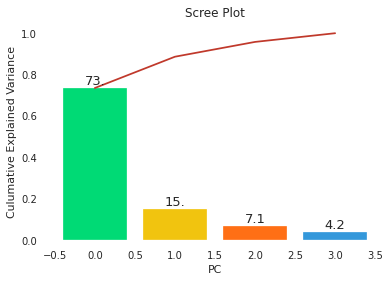

In [47]:
#PCA로 이상치 확인 (Scree plot- pc 개수 확인) -> 1개 혹은 2개 
#screeplot
import matplotlib.pyplot as plt
ax=plt.subplot()
#bar graph
ax.bar(ind,vals,color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db'])
#line graph
ax.plot(ind,cumvals,color='#c0392b')

for i in range(num_components):
  ax.annotate(r"%s"%((str(vals[i]*100)[:3])),(ind[i],vals[i]),va = "bottom", ha = "center", fontsize = 13)
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Culumative Explained Variance')

plt.show()

In [48]:
#pca_df만들기 -df_game_pca
df_game_pca=pd.DataFrame(df_pca,columns=['pc1','pc2','pc3','pc4'])
df_game_pca=pd.concat([df2[['Name','Genre','Year','Publisher','Total_Sales']],df_game_pca,],axis=1,)
df_game_pca

,Name,Genre,Year,Publisher,Total_Sales,pc1,pc2,pc3,pc4
0,Candace Kane's Candy Factory,Action,2008.0,Destineer,0.04,-0.622279,0.051158,-0.022385,0.004183
1,The Munchables,Action,2009.0,Namco Bandai Games,0.18,-0.478044,0.082942,-0.095627,0.099441
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,2010.0,Alchemist,0.02,-0.631333,-0.009120,0.028468,-0.016891
3,Deal or No Deal: Special Edition,Misc,2010.0,Zoo Games,0.04,-0.622279,0.051158,-0.022385,0.004183
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,2010.0,D3Publisher,0.25,-0.331732,0.176500,0.038974,-0.021043
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,Platform,2006.0,Vivendi Games,0.20,0.359953,0.348839,0.105203,0.173564
16594,Rainbow Islands: Revolution,Action,2005.0,Rising Star Games,0.01,-0.129453,-0.582164,0.281228,0.018337
16595,NBA 2K16,Sports,2015.0,Take-Two Interactive,0.79,-0.413664,-0.388662,0.183945,0.020371
16596,Toukiden: The Age of Demons,Action,2013.0,Tecmo Koei,0.38,NaN,NaN,NaN,NaN


In [ ]:
#시각화 (number of pc= 2)
import seaborn as sns
fig=plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(1,1,1)
ax2=fig.add_subplot(1,1,1)
ax3=fig.add_subplot(1,1,1)
ax4=fig.add_subplot(1,1,1)

ax1=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Genre')
plt.subplot(141)
ax2=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Publisher')
plt.subplot(142)
ax3=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Year')
plt.subplot(143)
ax4=sns.scatterplot(data=df_game_pca,x='pc1',y='pc2',hue='Total_Sales')
plt.subplot(144)
plt.title("Data After PCA")
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()

In [54]:
df2.sort_values(['Year'],ascending=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9276,Trade & Battle: Card Hero,GB,0.0,Strategy,Nintendo,0.00,0.00,0.2,0.00,0.20
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0.0,0.00,0.02
14666,Strider 2,PS,0.0,Platform,Virgin Interactive,0.05,0.03,0.0,0.01,0.09
2249,SplashDown,PS2,1.0,Racing,Atari,0.34,0.27,0.0,0.09,0.70
8681,NCAA Football 2002,PS2,1.0,Sports,Electronic Arts,0.77,0.60,0.0,0.20,1.57
...,...,...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16275,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.0,0.03,2.53
16278,Madden NFL 11,Wii,NaN,Sports,Unknown,0.70,0.00,0.0,0.05,0.75
16425,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0.00,0.0,0.00,0.06


In [59]:
#year 확인, 정상치  (1980-2020)
df2_year_unique=df2['Year'].unique()
np.sort(df2_year_unique)

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 8.600e+01,
       9.400e+01, 9.500e+01, 9.600e+01, 9.700e+01, 9.800e+01, 1.980e+03,
       1.981e+03, 1.982e+03, 1.983e+03, 1.984e+03, 1.985e+03, 1.986e+03,
       1.987e+03, 1.988e+03, 1.989e+03, 1.990e+03, 1.991e+03, 1.992e+03,
       1.993e+03, 1.994e+03, 1.995e+03, 1.996e+03, 1.997e+03, 1.998e+03,
       1.999e+03, 2.000e+03, 2.001e+03, 2.002e+03, 2.003e+03, 2.004e+03,
       2.005e+03, 2.006e+03, 2.007e+03, 2.008e+03, 2.009e+03, 2.010e+03,
       2.011e+03, 2.012e+03, 2.013e+03, 2.014e+03, 2.015e+03, 2.016e+03,
       2.017e+03, 2.020e+03,       nan])

In [91]:
# year 정상치 ( 1980- 2020 ) - df2_goodyear 16226/16596
df2_goodyear=df2.loc[(df2['Year']>=1980)&(df2['Year']<=2020)]
df2_goodyear.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
Total_Sales    float64
dtype: object

In [83]:
df2.Total_Sales.sum()

8915.820000000002

In [84]:
#이상한 년도 df2_badyear 370/ 16596 (ea)-2.2%, 160/8915 - 1.7%
df2_badyear=df2[~df2.Year.isin(df2_goodyear.Year)]
df2_badyear.Total_Sales.sum()

160.99

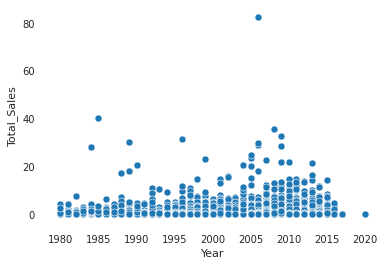

In [92]:
#Scatter Plot
sns.scatterplot(data=df2_goodyear,x=df2_goodyear.Year,y=df2_goodyear.Total_Sales,)

In [100]:
#clustering 용 year &total sales 추출 from df2_good year - df3 
df3=df2_goodyear[["Year","Total_Sales"]]
df3

,Year,Total_Sales
0,2008.0,0.04
1,2009.0,0.18
2,2010.0,0.02
3,2010.0,0.04
4,2010.0,0.25
...,...,...
16593,2006.0,0.20
16594,2005.0,0.01
16595,2015.0,0.79
16596,2013.0,0.38


In [101]:
#Elbow methods
from sklearn.cluster import KMeans
sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(df3)
  sum_of_squared_distances.append(km.inertia_)

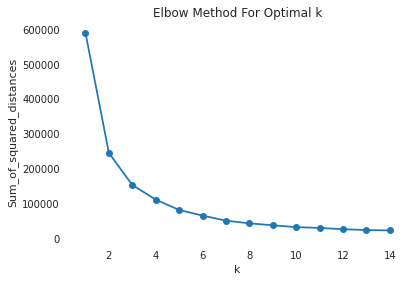

In [104]:
#Elbow method 시각화 -> 5
plt.plot(K,sum_of_squared_distances,"o-")
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [106]:
#K-means cluster 구하기 (5개)
kmeans=KMeans(n_clusters=5)
kmeans.fit(df3)
labels=kmeans.labels_
print(labels)

cluster_center=kmeans.cluster_centers_
cluster_center

[1 1 1 ... 2 2 4]


array([[1.98545627e+03, 1.81361217e+00],
       [2.00811643e+03, 4.59869572e-01],
       [2.01297979e+03, 4.92298523e-01],
       [2.00322761e+03, 5.60010599e-01],
       [1.99729124e+03, 6.72241801e-01]])

In [108]:
new_series=pd.Series(labels)
df3['clusters']=new_series.values
df3
#get centroids
centroids=df3.groupby(by=['clusters']).mean()
centroids

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Total_Sales
clusters,,
0,1985.456274,1.813612
1,2008.116431,0.459870
2,2012.979788,0.492299
3,2003.227610,0.560011
4,1997.291238,0.672242


KeyError: ignored

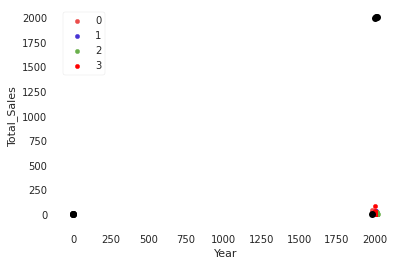

In [125]:
#K-means 시각화
colors = {0 : '#eb4d4b', 1 : '#4834d4', 2 : '#6ab04c',3:'r'}
fig, ax = plt.subplots()
ax.plot(centroids.iloc[0].Year,centroids.iloc[0].Total_Sales,"ok")
ax.plot(centroids.iloc[1],centroids.iloc[1],"ok")
ax.plot(centroids.iloc[2],centroids.iloc[2],"ok")
ax.plot(centroids.iloc[3],centroids.iloc[3],"ok")

grouped = df3.groupby('clusters')
for key, group in grouped:
    group.plot(ax = ax, kind ='scatter', x ='Year', y ='Total_Sales', label = key, color = colors[key])
plt.show()

In [123]:
grouped= df3.groupby(by='clusters')
